In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import shutil
import os
import numpy as np

rawdata_path="/content/drive/MyDrive/ColabNotebooks/OwnPractice/pretrainednetwork_featureextractor/rawdata/"
root_path="/content/drive/MyDrive/ColabNotebooks/OwnPractice/pretrainednetwork_featureextractor/data/"
class_name = os.listdir(rawdata_path)
datadirs_name=['train','valid','test']
try:
  for i in class_name:
    os.makedirs(root_path+"/train/"+i)
    os.makedirs(root_path+"/valid/"+i)
    os.makedirs(root_path+"/test/"+i)
    print("Directory Created Successfully")
except FileExistsError as error:
    print("Directory Already Exist")


class_file_paths=[]
train_split_ratio=0.7
valid_split_ratio=0.9 
#not necessary for test_split_ratio
for i in class_name:
  class_path= rawdata_path+i
  print(class_path)
  all_fileNames=os.listdir(class_path)
  print(all_fileNames)
  #print(all_fileNames)
  np.random.shuffle(all_fileNames)

  train_fileNames, valid_fileNames,test_fileNames=np.split(all_fileNames,
                                                            [int(len(all_fileNames)*train_split_ratio),int(len(all_fileNames)*valid_split_ratio)])

  print(train_fileNames)
  #for eachfile in list_trainfilepath:
  for eachfile in train_fileNames:
    shutil.copy(rawdata_path+i+"/"+eachfile  ,root_path+"/train/"+i+"/"+eachfile)
  
  for eachfile in valid_fileNames:
    shutil.copy(rawdata_path+i+"/"+eachfile  ,root_path+"/valid/"+i+"/"+eachfile)
  
  for eachfile in test_fileNames:
    shutil.copy(rawdata_path+i+"/"+eachfile  ,root_path+"/test/"+i+"/"+eachfile)
 
    
  #copy the images over to the train, valid, test folders

Directory Created Successfully
Directory Created Successfully
/content/drive/MyDrive/ColabNotebooks/OwnPractice/pretrainednetwork_featureextractor/rawdata/pom
['192.jpg', '174.jpg', '193.jpg', '10.jpg', '113.jpg', '94.jpg', '116.jpg', '99.jpg', '111.jpg', '160.jpg', '65.jpg', '135.jpg', '84.jpg', '117.jpg', '8.jpg', '55.jpg', '172.jpg', '22.jpg', '26.jpg', '34.jpg', '39.jpg', '147.jpg', '36.jpg', '53.jpg', '4.jpg', '27.jpg', '178.jpg', '28.jpg', '128.jpg', '63.jpg', '83.jpg', '168.jpg', '186.jpg', '64.jpg', '89.jpg', '85.jpg', '30.jpg', '95.jpg', '119.jpg', '132.jpg', '3.jpg', '180.jpg', '188.jpg', '151.jpg', '170.jpg', '143.jpg', '42.jpg', '198.jpg', '185.jpg', '140.jpg', '164.jpg', '167.jpg', '73.jpg', '156.jpg', '145.jpg', '134.jpg', '181.jpg', '20.jpg', '46.jpg', '77.jpg', '157.jpg', '184.jpg', '202.jpg', '166.jpg', '165.jpg', '2.jpg', '14.jpg', '171.jpg', '88.jpg', '44.jpg', '69.jpg', '109.jpg', '195.jpg', '107.jpg', '124.jpg', '201.jpg', '131.jpg', '80.jpg', '29.jpg', '60.jpg', '

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [48]:
train_path=root_path+"train/"
valid_path=root_path+"valid/"
test_path=root_path+"test/"

train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),batch_size=10)
#if shuffle=False, the model performance is very poor. Low accuracy and val accuracy.

valid_batches=ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),batch_size=10)

test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),batch_size=1,shuffle=False)

Found 280 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 41 images belonging to 2 classes.


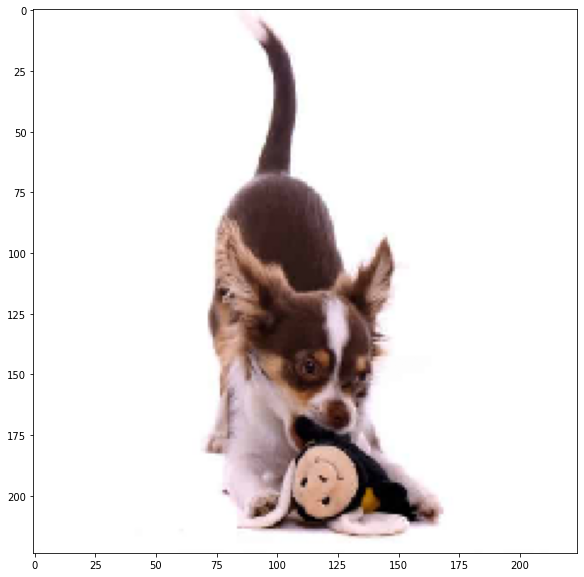

In [49]:
#Visualise ImageDataGenerator output
import matplotlib.pyplot as plt

# trial_image=next(train_batches)
# trial_image[0][0].shape
def img_preprocessing_func(img):
  image=np.array(img)
  #print(image)
  return image/255

# train_batches[0]
plt.figure(figsize=(10,10))
plt.imshow(img_preprocessing_func(next(train_batches)[0][0]))

In [50]:
from tensorflow.keras.applications import vgg16
#https://keras.io/api/applications/vgg/
base_model=vgg16.VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
for layer in base_model.layers:
  layer.trainable=False

In [51]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

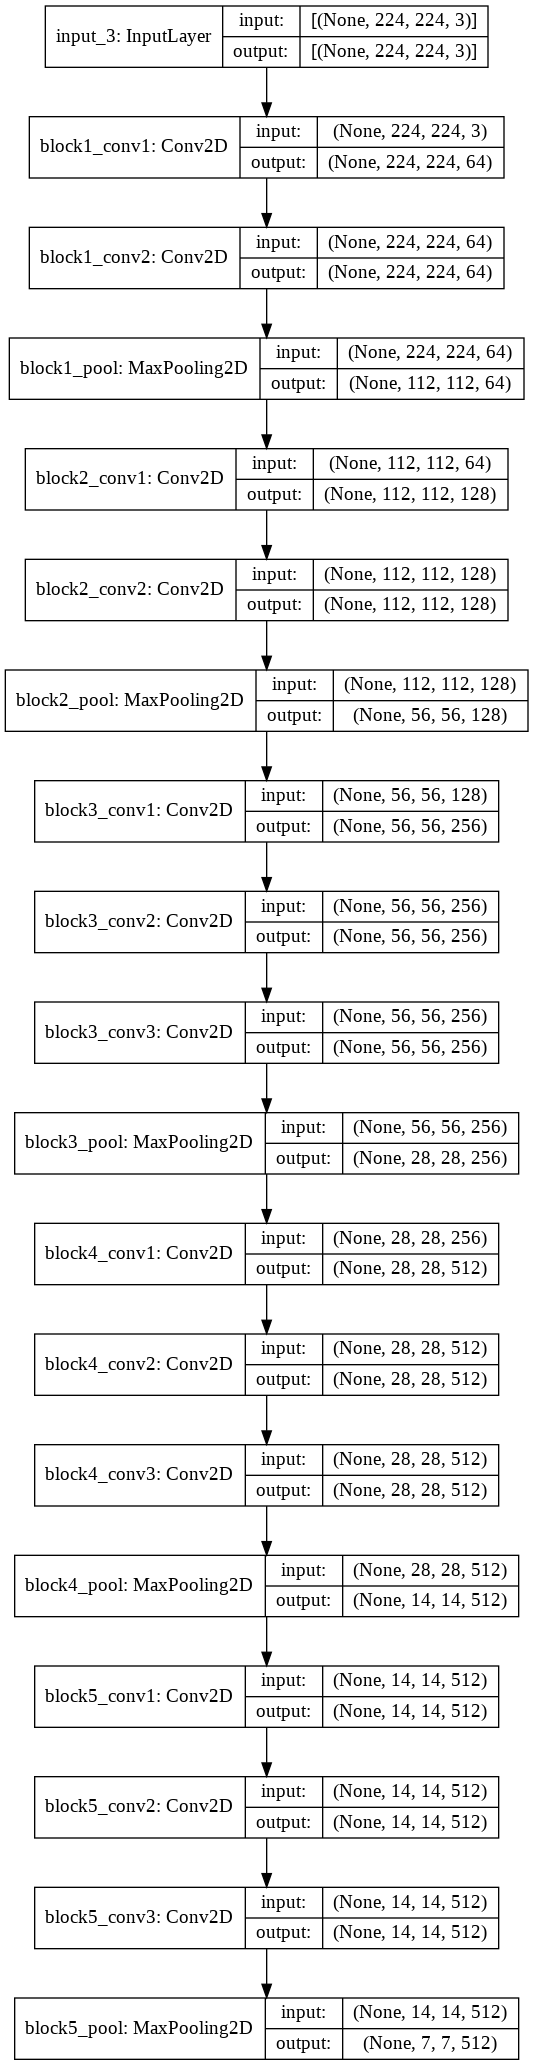

In [52]:
from tensorflow.keras.utils import plot_model
display(plot_model(base_model,show_shapes=True))

In [53]:
last_layer=base_model.get_layer('block5_pool')
last_output=last_layer.output

In [54]:
from tensorflow.keras.layers import Dense, Flatten,Dropout, BatchNormalization 
from tensorflow.keras import Model

In [55]:
x=Flatten()(last_output)
x=Dense(64,activation='relu',name='FC_2')(x)
x=BatchNormalization()(x)
x=Dropout(0.3)(x)
x=Dense(2, activation='softmax',name='softmax')(x)

new_model=Model(inputs=base_model.input,outputs=x)
new_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [56]:
import tensorflow as tf
tf.keras.backend.clear_session


<function tensorflow.python.keras.backend.clear_session>

In [57]:
from tensorflow.keras.optimizers import Adam
new_model.compile(Adam(learning_rate=0.0001),loss='categorical_crossentropy',
                  metrics=['accuracy'])
train_batches.reset()
valid_batches.reset()
history=new_model.fit(train_batches,
                        steps_per_epoch=4,
                        validation_data=valid_batches,validation_steps=2,
                        epochs=40,
                        verbose=2
                        )

Epoch 1/40
4/4 - 2s - loss: 1.2116 - accuracy: 0.5250 - val_loss: 4.6500 - val_accuracy: 0.5000
Epoch 2/40
4/4 - 2s - loss: 0.8595 - accuracy: 0.6250 - val_loss: 1.6343 - val_accuracy: 0.6500
Epoch 3/40
4/4 - 2s - loss: 0.5109 - accuracy: 0.7750 - val_loss: 0.6329 - val_accuracy: 0.9000
Epoch 4/40
4/4 - 1s - loss: 0.4131 - accuracy: 0.8750 - val_loss: 0.4967 - val_accuracy: 0.8000
Epoch 5/40
4/4 - 2s - loss: 0.1521 - accuracy: 0.9500 - val_loss: 0.3388 - val_accuracy: 0.8500
Epoch 6/40
4/4 - 1s - loss: 0.1593 - accuracy: 0.9250 - val_loss: 0.1513 - val_accuracy: 0.9500
Epoch 7/40
4/4 - 2s - loss: 0.3982 - accuracy: 0.8000 - val_loss: 0.6676 - val_accuracy: 0.8500
Epoch 8/40
4/4 - 1s - loss: 0.2057 - accuracy: 0.9000 - val_loss: 0.2915 - val_accuracy: 0.9000
Epoch 9/40
4/4 - 2s - loss: 0.1783 - accuracy: 0.9000 - val_loss: 0.0512 - val_accuracy: 1.0000
Epoch 10/40
4/4 - 1s - loss: 0.0307 - accuracy: 1.0000 - val_loss: 0.1698 - val_accuracy: 0.9500
Epoch 11/40
4/4 - 2s - loss: 0.1718 - a

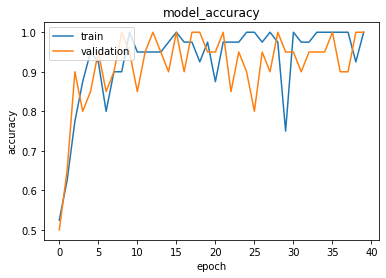

In [58]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.legend(['train','validation'],loc='upper left')

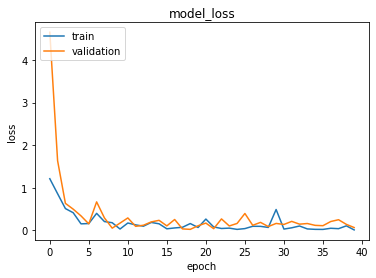

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

In [60]:
from sklearn.metrics import confusion_matrix


In [61]:
test_batches.reset()
new_model.evaluate(test_batches)

41/41 [==============================] - 1s 20ms/step - loss: 0.2414 - accuracy: 0.9268


[0.24142318964004517, 0.9268292784690857]

In [62]:
test_batches.reset()
labels=test_batches.class_indices
y_true=test_batches.classes
pred=new_model.predict(test_batches, verbose=2)

y_pred_classes=np.argmax(pred,axis=1)

41/41 - 1s


In [63]:
y_pred_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [64]:
labels

{'chihuahua': 0, 'pom': 1}

In [65]:
#have to put shuffle=False when you use .flow_from_directory() 
#so the samples don't get shuffled and will have the same order as test_batches.classes

y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [66]:
mismatched_index=[index for index, elem in enumerate(y_pred_classes) if elem!=y_true[index]]
print(mismatched_index)

[26, 31, 34]


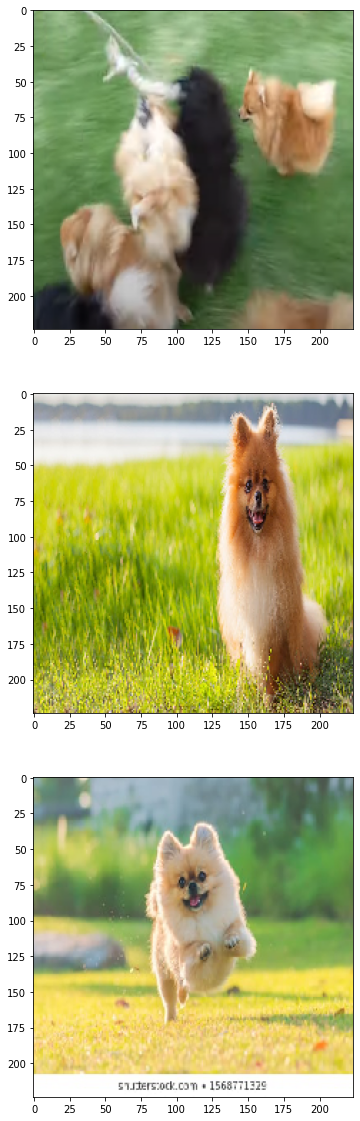

In [67]:
# visualize the wrongly classified test samples
fig, ax=plt.subplots(len(mismatched_index), figsize=(20,20))

for i, index in enumerate(mismatched_index):
  ax[i].imshow(img_preprocessing_func(test_batches[index][0][0]))


In [70]:
cm=confusion_matrix(y_true,y_pred_classes)
print(cm)

[[20  0]
 [ 3 18]]


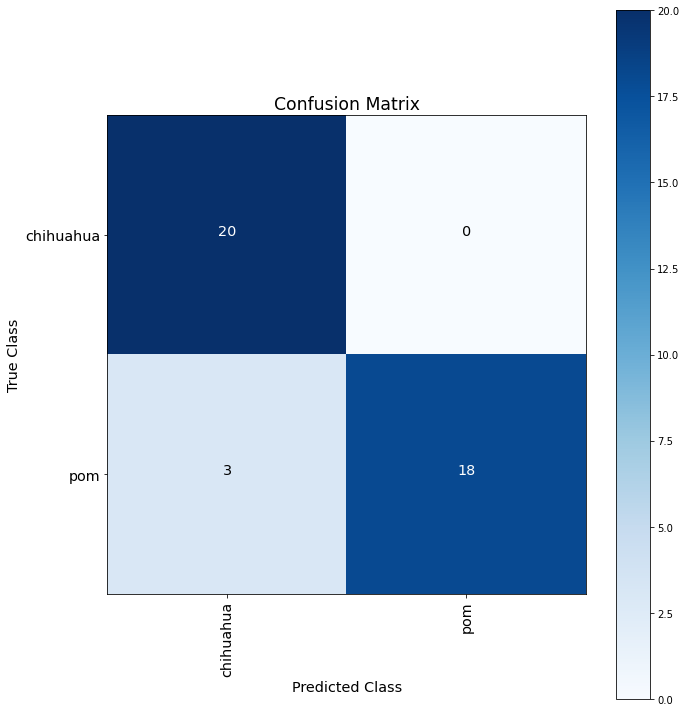

In [71]:

import itertools
def plot_confusion_matrix(cm, classes, normalize=False,
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues):
  plt.figure(figsize=(10,10))
  
  plt.imshow(cm,interpolation="nearest",cmap=cmap)

  plt.title(title, fontsize='xx-large')
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, fontsize="x-large",rotation=90)
  plt.yticks(tick_marks, classes, fontsize="x-large")


  for class_i,class_j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(class_j,class_i,cm[class_i,class_j],
             fontsize="x-large",
             horizontalalignment='center',
             color="white" if cm[class_i,class_j]>cm.max()/2 else "black"
             )
    plt.tight_layout()
    plt.ylabel("True Class", fontsize='x-large')
    plt.xlabel("Predicted Class", fontsize='x-large')

plot_confusion_matrix(cm,classes=list(labels.keys()))